In [16]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2950 sha256=dc5b65c566e97e98f45f1c6a7af268dc82631e0e5689e68a0e31559251c2fe96
  Stored in directory: /Users/jason/Library/Caches/pip/wheels/f3/6d/ba/d999da6dff3d5cc6735e9855579fa236bf7c5bdbb210a873b8
Successfully built sklearn


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from openbb_terminal.sdk import openbb
from sklearn.decomposition import PCA

In [13]:
plt.style.use("default")
plt.rcParams["figure.figsize"] = [5.5, 4.0]
plt.rcParams["figure.dpi"] = 140
plt.rcParams["lines.linewidth"] = 0.75
plt.rcParams["font.size"] = 8

In [14]:
# gold: NEM, RGLD, SSRM, CDE
# healthcard: LLY, UNH, JNJ, MRK
symbols = ["NEM", "RGLD", "SSRM", "CDE", "LLY", "UNH", "JNJ", "MRK"]
data = openbb.economy.index(
    symbols, 
    start_date="2020-01-01", 
    end_date="2022-12-31"
)

In [15]:
returns = data.pct_change().dropna()

In [16]:
pca = PCA(n_components=3)
pca.fit(returns)

PCA(n_components=3)

In [17]:
pct = pca.explained_variance_ratio_
pca_components = pca.components_

(0.0, 100.0)

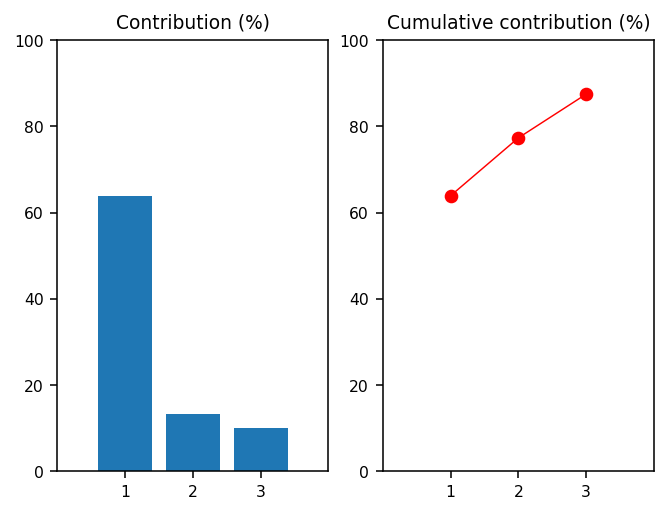

In [18]:
cum_pct = np.cumsum(pct)
x = np.arange(1, len(pct) + 1, 1)

plt.subplot(1, 2, 1)
plt.bar(x, pct * 100, align="center")
plt.title("Contribution (%)")
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.plot(x, cum_pct * 100, "ro-")
plt.title("Cumulative contribution (%)")
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

From these principal components we can construct "statistical risk factors", similar to more conventional common risk factors. These should give us an idea of how much of the portfolio's returns comes from some unobservable statistical feature.

In [19]:
X = np.asarray(returns)
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(
    columns=["f1", "f2", "f3"], 
    index=returns.index, 
    data=factor_returns
)
factor_returns

,f1,f2,f3
Date,,,
2020-01-03,-0.028845,0.007909,-0.013464
2020-01-06,-0.081169,-0.006509,0.058871
2020-01-07,0.003694,0.015644,0.013973
2020-01-08,-0.105891,-0.028187,0.005724
2020-01-09,0.001918,-0.018469,-0.023525
...,...,...,...
2022-12-23,0.001577,-0.007421,0.020944
2022-12-27,0.079415,0.010207,-0.022547
2022-12-28,-0.081088,-0.004773,-0.005837


In [20]:
factor_exposures = pd.DataFrame(
    index=["f1", "f2", "f3"], 
    columns=returns.columns, 
    data=pca_components
).T
factor_exposures

,f1,f2,f3
NEM,0.292250,0.091439,0.394104
RGLD,0.308669,0.125097,0.416761
SSRM,0.427029,0.227828,0.485778
CDE,0.783970,-0.030216,-0.618241
LLY,0.062207,-0.605558,0.131696
UNH,0.101891,-0.535551,0.136475
JNJ,0.061262,-0.338931,0.108649
MRK,0.065923,-0.393423,0.070823


<AxesSubplot:>

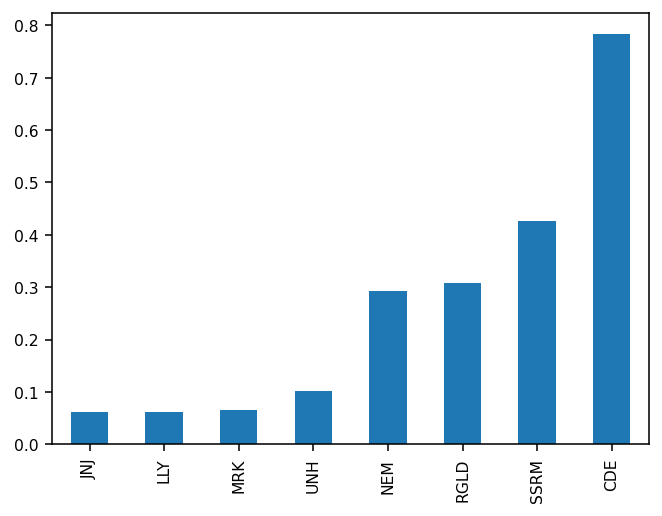

In [21]:
factor_exposures.f1.sort_values().plot.bar()

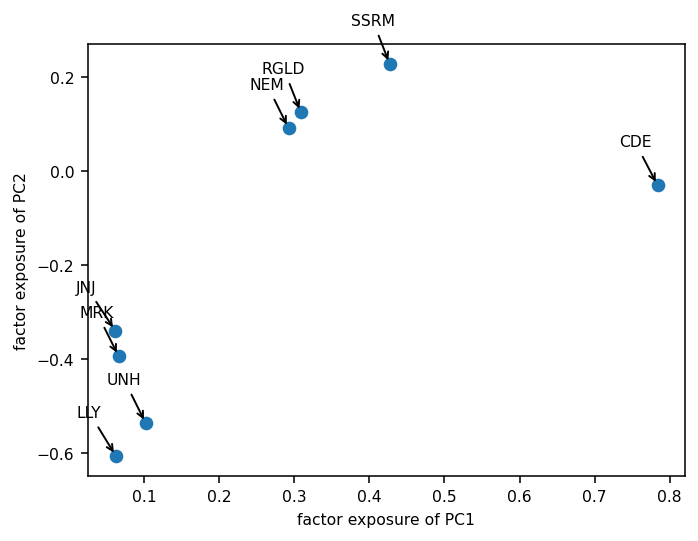

In [22]:
labels = factor_exposures.index
data = factor_exposures.values
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("factor exposure of PC1")
plt.ylabel("factor exposure of PC2")

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(-20, 20),
        textcoords="offset points",
        arrowprops=dict(
            arrowstyle="->", 
            connectionstyle="arc3,rad=0"
        ),
    )